In [45]:
import scipy.stats as ss
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
tab0 = Table.read('../Sampling/FullSampleWithLum.fits')
tab1 = Table.read('../LumMatch/LumMatch.fits')

In [46]:
# T1 sample
frat = tab0['frat_nv/civ']
# mask = (frat>0)
frat=frat
iw3 = tab0['i-w3']
rw3 = tab0['r-w3']
rz = tab0['r-z']
rew = tab0['rew_gf']
kt80 = tab0['kurt80_gf']
fwhm = tab0['fwhm_gf']
asy= tab0['asy_gf']
bal = tab0['bal_flag_vi']
iz = iw3 - rw3 + rz
L = tab0['Lum']


In [47]:
# LM sample
frat_L = tab1['frat_nv/civ']
# mask = (frat_L>0)
frat_L=frat_L
iw3_L = tab1['i-w3']
rw3_L = tab1['r-w3']
rz_L = tab1['r-z']
rew_L = tab1['rew_gf']
kt80_L = tab1['kurt80_gf']
fwhm_L = tab1['fwhm_gf']
asy_L = tab1['asy_gf']
bal_L = tab1['bal_flag_vi']
iz_L = iw3_L - rw3_L + rz_L
L_L = tab1['Lum']

In [48]:
sum(frat==-1)

0

In [49]:
#  ERQ sample
erq0 = iw3>4.6
iw3_erq0 = iw3[erq0]
rew_erq0 = rew[erq0]
kt80_erq0 =  kt80[erq0]
fwhm_erq0 =  fwhm[erq0]
rw3_erq0 = rw3[erq0]
rz_erq0 =  rz[erq0]
frat_erq0 =frat[erq0]
asy_erq0 =  asy[erq0]
L_erq0 =  L[erq0]
iz_erq0 = iw3_erq0 - rw3_erq0 + rz_erq0

In [50]:
#  CERQ sample
erq1 = (iw3>=4.6) & (rew>=100)
iw3_erq1 = iw3[erq1]
rew_erq1 = rew[erq1]
kt80_erq1 =  kt80[erq1]
fwhm_erq1 =  fwhm[erq1]
rw3_erq1 = rw3[erq1]
rz_erq1 =  rz[erq1]
frat_erq1 =frat[erq1]
asy_erq1 =  asy[erq1]
L_erq1 =  L[erq1]
iz_erq1 = iw3_erq1 - rw3_erq1 + rz_erq1

In [81]:
scaler = MinMaxScaler()
from seaborn import pairplot, kdeplot
import pandas as pd
data_s = scaler.fit_transform(np.array(list(zip(iw3, np.log10(rew), kt80, frat, fwhm, iz, L))))
data_L_s = scaler.fit_transform(np.array(list(zip(iw3_L, np.log10(rew_L), kt80_L, frat_L, fwhm_L, iz_L, L_L))))
data = np.array(list(zip(iw3, np.log10(rew), kt80, frat, fwhm, iz, L)))
data_L = np.array(list(zip(iw3_L, np.log10(rew_L), kt80_L, frat_L, fwhm_L, iz_L, L_L)))
data_erq0 = np.array(list(zip(iw3_erq0, np.log10(rew_erq0), kt80_erq0, frat_erq0, fwhm_erq0, iz_erq0, L_erq0)))
data_erq1 = np.array(list(zip(iw3_erq1, np.log10(rew_erq1), kt80_erq1, frat_erq1, fwhm_erq1, iz_erq1, L_erq1)))


data = np.array(list(zip(iw3, (rew), kt80, frat, fwhm, iz, L)))
data_L = np.array(list(zip(iw3_L, (rew_L), kt80_L, frat_L, fwhm_L, iz_L, L_L)))
data_erq0 = np.array(list(zip(iw3_erq0, np.log10(rew_erq0), kt80_erq0, frat_erq0, fwhm_erq0, iz_erq0, L_erq0)))
data_erq1 = np.array(list(zip(iw3_erq1, np.log10(rew_erq1), kt80_erq1, frat_erq1, fwhm_erq1, iz_erq1, L_erq1)))


df = pd.DataFrame(data=data, columns=['i-w3', 'REW', 'kt80','NV/CIV', 'FWHM', 'i-z', 'Lum'])
df_L = pd.DataFrame(data=data_L, columns=['i-w3', 'REW','kt80' , 'NV/CIV', 'FWHM', 'i-z', 'Lum'])


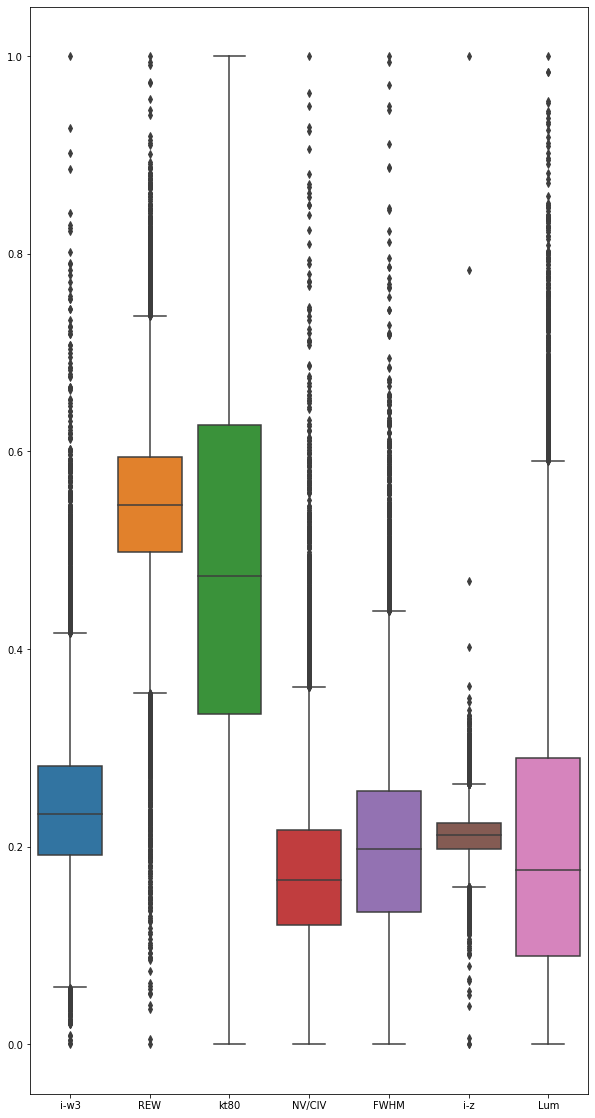

In [31]:
# Getting to know the data by Box plot of raw data and scaled data
import seaborn as sn
import matplotlib.pyplot as plt
# Outliners detection and class imbalance

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=df_L, orient="v",ax=axes)
plt.savefig('box_plot_scaled_L.png', dpi=200)
plt.show()
# # Correlation analysis
# corrMatt = df_L.corr()
# mask = np.array(corrMatt)
# # mask[np.tril_indices_from(mask)] = False
# fig,ax= plt.subplots()
# fig.set_size_inches(20,10)
# sn.heatmap(corrMatt, vmax=.95, annot=True)
# plt.savefig('cor-matrix_L.png', dpi=800)
# plt.show()

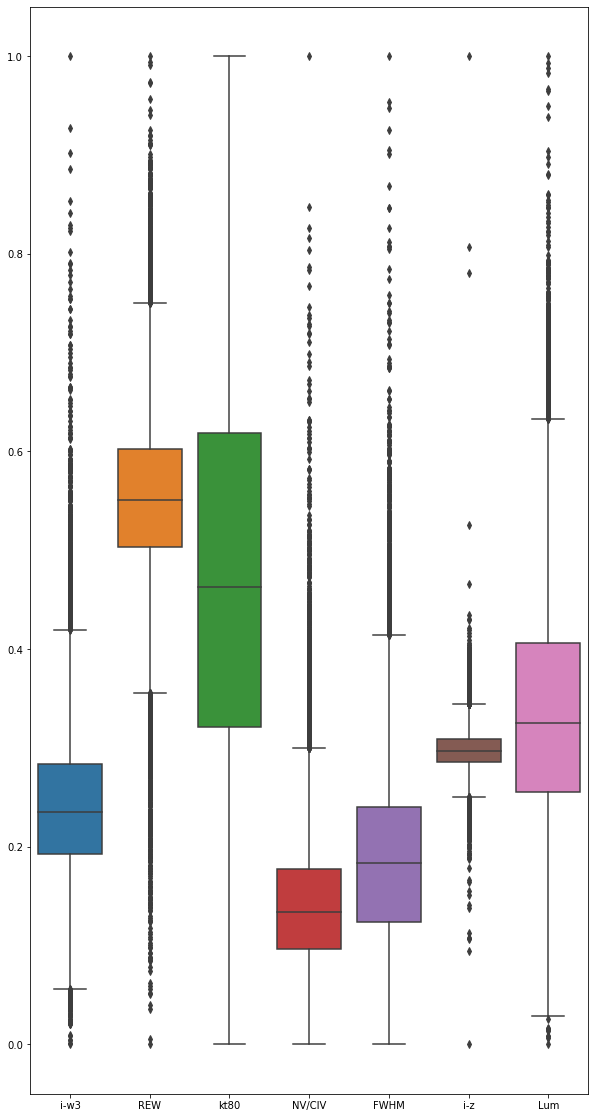

In [33]:
# Getting to know the data by Box plot of raw data and scaled data
import seaborn as sn
import matplotlib.pyplot as plt
# Outliners detection and class imbalance

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=df, orient="v",ax=axes)
plt.savefig('box_plot_scaled.png', dpi=200)
plt.show()
# # Correlation analysis
# corrMatt = df.corr()
# mask = np.array(corrMatt)
# # mask[np.tril_indices_from(mask)] = False
# fig,ax= plt.subplots()
# fig.set_size_inches(20,10)
# sn.heatmap(corrMatt, vmax=.95, annot=True)
# plt.savefig('cor-matrix.png', dpi=200)
# plt.show()

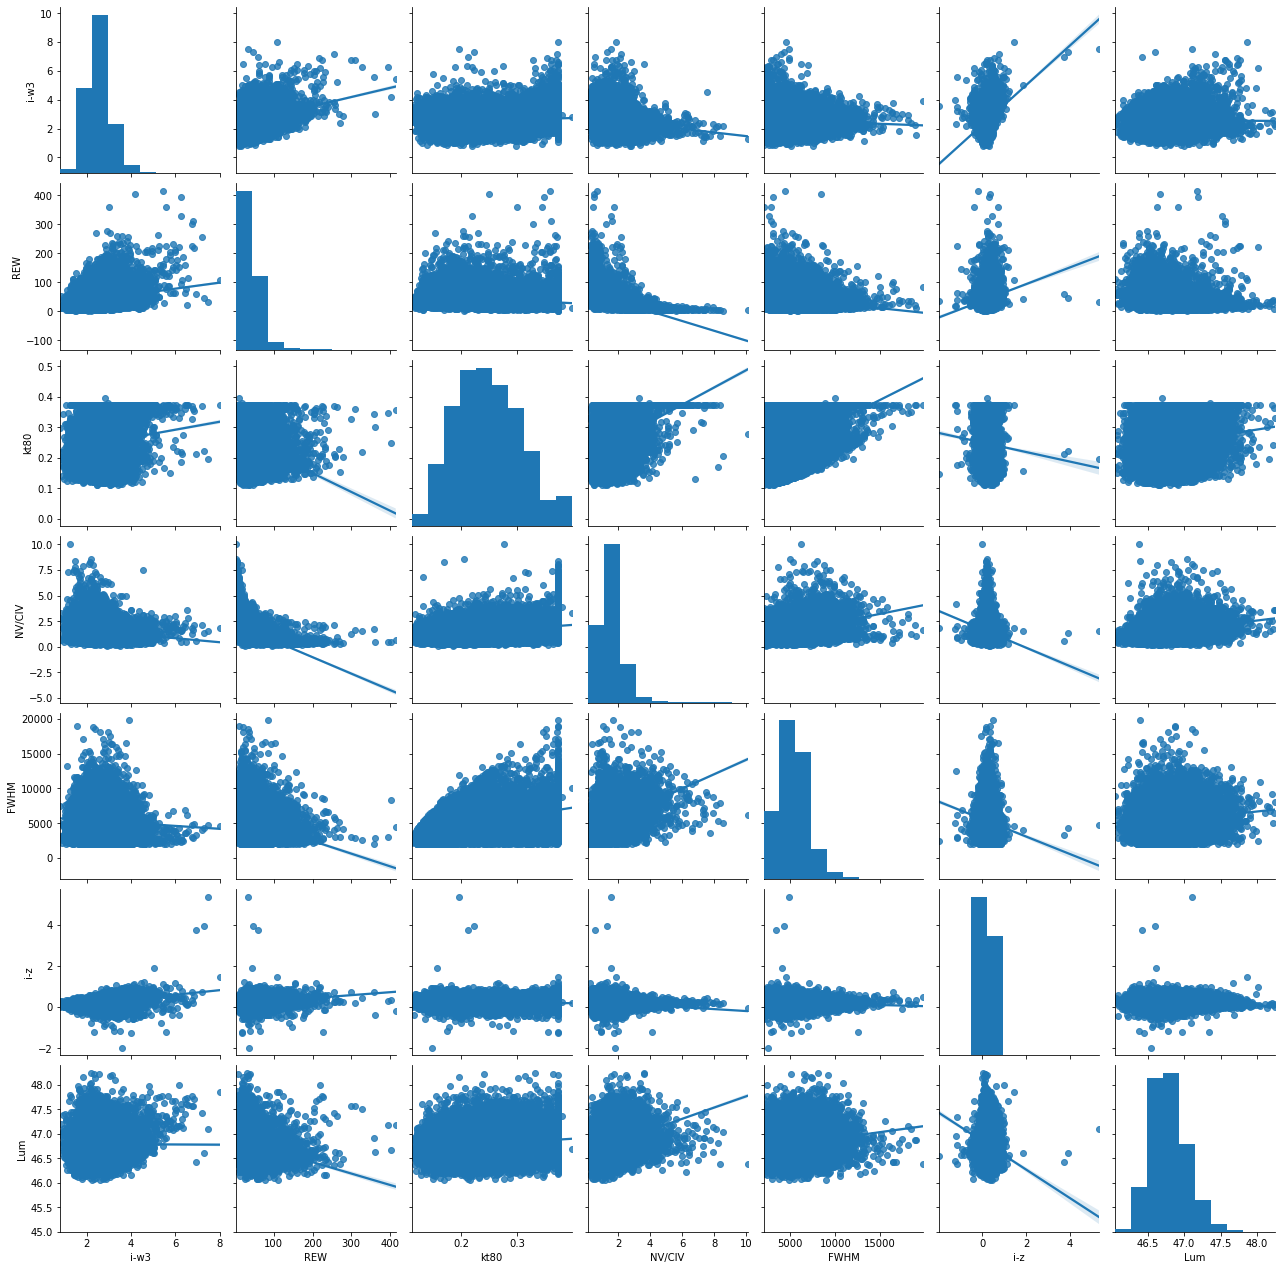

In [82]:
sns_plot = pairplot(df, kind='reg')
plt.savefig('pair_plot.png')

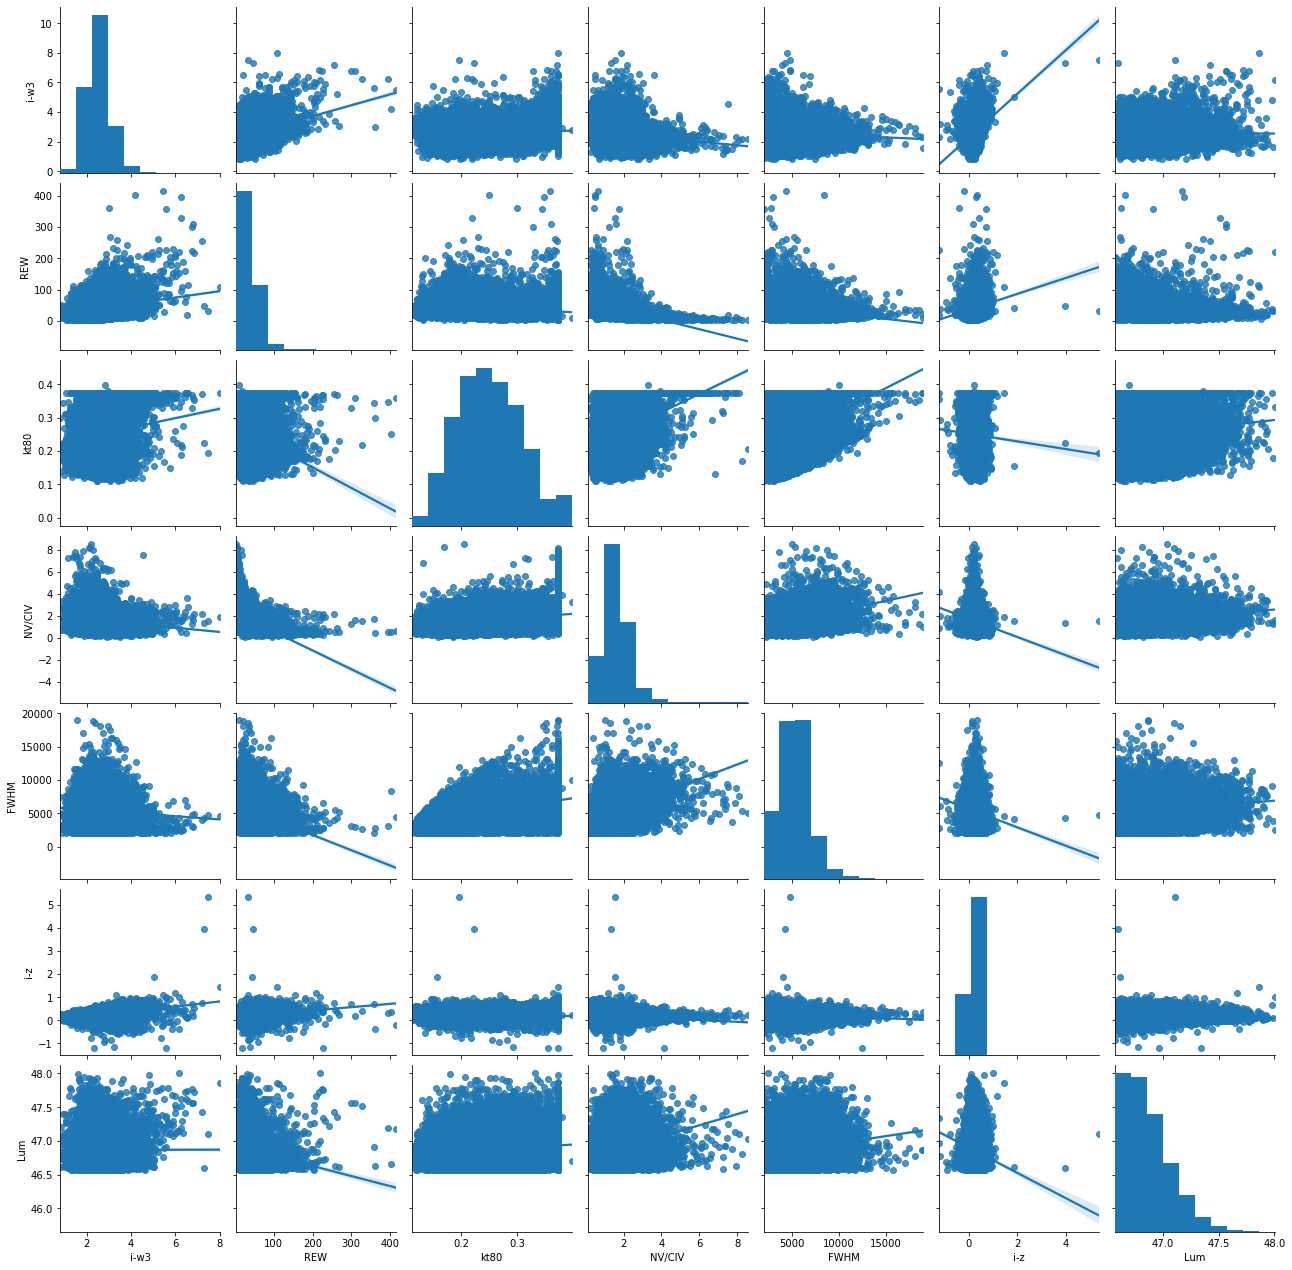

In [83]:
sns_plot = pairplot(df_L, kind='reg')
plt.savefig('pair_plot_reg.png')

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

CC = data_s
CC_L = data_L_s
CC_erq0 = data_s[~erq0]
CC_erq1 = data_s[~erq1]
R2=np.zeros([7,7])
R2_err=np.zeros([7,7])
R2_L=np.zeros([7,7])
a_L=np.zeros([7,7])
b_L=np.zeros([7,7])
a=np.zeros([7,7])
b=np.zeros([7,7])
a_err=np.zeros([7,7])
b_err=np.zeros([7,7])

for i in range(7):
    for j in range(7):
        if(j>i):
            reg = LinearRegression()

            x ,y = CC[:,i], CC[:,j]
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg.fit(x,y)
            y_pred = reg.predict(x)
            R2[i,j] = r2_score(y,y_pred)
            a[i,j] = reg.coef_
            b[i,j] = reg.intercept_
            
            
            # BootStrap 
            D = np.array(list(zip(x,y)))
            a_pool=[]
            b_pool=[]
            for k in range(200):
                ind_s = np.random.choice(range(len(D)), len(D), replace=True)
                D_s = D[ind_s,:]
                x_s, y_s = D_s[:,0], D_s[:,1]
                x_s=x_s.reshape(-1,1)
                y_s=y_s.reshape(-1,1)
                reg.fit(x_s,y_s)
                a_pool.append(reg.coef_)
                b_pool.append(reg.intercept_)
            
            a_err[i,j] = np.std(a_pool)
            b_err[i,j] = np.std(b_pool)
            
            x ,y = CC_erq0[:,i], CC_erq0[:,j]
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg = LinearRegression().fit(x,y)
            R2_L[i,j] = reg.score(x,y)
            a_L[i,j] = reg.coef_
            b_L[i,j] = reg.intercept_
            if((abs(a_L[i,j]-a[i,j])> 2*a_err[i,j]) & (abs(b_L[i,j]-b[i,j])>2*b_err[i,j]) & (R2[i,j]>0.1)):
                print(i,j, R2[i,j], R2_L[i,j], a[i,j], a_L[i,j])
                
            
 
   

1 2 0.10065962819338636 0.11208601735093993 -0.732065514864588 -0.777215989608677
1 3 0.42183318987325 0.4348155139697858 -0.5143530694189251 -0.5274411544917523


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# CC = data
# CC_L = data_L
# CC_erq0 = data[~erq0]
# CC_erq1 = data[~erq1]
R2=np.zeros([7,7])
R2_err=np.zeros([7,7])
R2_L=np.zeros([7,7])
a_L=np.zeros([7,7])
b_L=np.zeros([7,7])
a=np.zeros([7,7])
b=np.zeros([7,7])
a_err=np.zeros([7,7])
b_err=np.zeros([7,7])

for i in range(7):
    for j in range(7):
        if(j>i):
            reg = LinearRegression()

            x ,y = CC[:,i], CC[:,j]
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg.fit(x,y)
            y_pred = reg.predict(x)
            R2[i,j] = r2_score(y,y_pred)
            a[i,j] = reg.coef_
            b[i,j] = reg.intercept_
            
            
            # BootStrap 
            D = np.array(list(zip(x,y)))
            a_pool=[]
            b_pool=[]
            for k in range(200):
                ind_s = np.random.choice(range(len(D)), len(D), replace=True)
                D_s = D[ind_s,:]
                x_s, y_s = D_s[:,0], D_s[:,1]
                x_s=x_s.reshape(-1,1)
                y_s=y_s.reshape(-1,1)
                reg.fit(x_s,y_s)
                a_pool.append(reg.coef_)
                b_pool.append(reg.intercept_)
            
            a_err[i,j] = np.std(a_pool)
            b_err[i,j] = np.std(b_pool)
            
            x ,y = CC_erq1[:,i], CC_erq1[:,j]
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg = LinearRegression().fit(x,y)
            R2_L[i,j] = reg.score(x,y)
            a_L[i,j] = reg.coef_
            b_L[i,j] = reg.intercept_
            if((abs(a_L[i,j]-a[i,j])> 2*a_err[i,j]) & (R2[i,j]>0.1) & (abs(b_L[i,j]-b[i,j])> 2*b_err[i,j])):
                print(i,j, R2[i,j], R2_L[i,j], a[i,j], a_L[i,j])
                
            
 
   

1 2 0.10065962819338636 0.10927566846869985 -0.732065514864588 -0.7684147240617064


In [90]:
a_L[1,4]

-0.32867208225352057

In [92]:
R2[1,4]

0.09392776182598706